<a href="https://colab.research.google.com/github/MeenTers/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/data_viz'

In [5]:
data = pd.read_csv(os.path.join(path,'search_request.csv'))
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


## เตรียมข้อมูล

### แปลงข้อมูลบอกเวลาให้เป็นตัวแปร datetime

In [6]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

## Bar chart(กราฟแท่ง)

### สร้างกราฟแท่งเปรียบเทียบปริมาณคนเข้าใช้ Web Wongnai.com เพื่อคนหาร้านอาหารในแต่ละวัน

In [20]:
mon = data[data['search_timestamp'].dt.dayofweek == 0].count()
tue = data[data['search_timestamp'].dt.dayofweek == 1].count()
wen = data[data['search_timestamp'].dt.dayofweek == 2].count()
thu = data[data['search_timestamp'].dt.dayofweek == 3].count()
fri = data[data['search_timestamp'].dt.dayofweek == 4].count()
sat = data[data['search_timestamp'].dt.dayofweek == 5].count()
son = data[data['search_timestamp'].dt.dayofweek == 6].count()

1076297

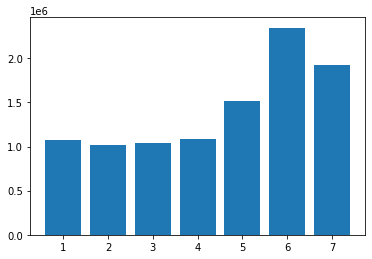

In [25]:
plt.bar([1,2,3,4,5,6,7],[mon.iloc[2],tue.iloc[2],wen.iloc[2],thu.iloc[2],fri.iloc[2],sat.iloc[2],son.iloc[2]]);